<a href="https://colab.research.google.com/github/fairyjihyun/competition/blob/main/DACON/%EC%9D%98%EB%A5%98%EC%A0%9C%EC%A1%B0%ED%9A%8C%EC%82%AC%EC%83%9D%EC%82%B0%EC%84%B1%EC%98%88%EC%B8%A1AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 실행 후 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data Handling
import pandas as pd
import numpy as np
import random
import os
import warnings
warnings.filterwarnings(action='ignore')

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns
sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) 

## Load the data

In [ ]:
cd/content/drive/MyDrive/Colab Notebooks/DACON/의류 제조 회사 생산성 예측 AI/open

/content/drive/MyDrive/Colab Notebooks/DACON/의류 제조 회사 생산성 예측 AI/open


In [ ]:
train = pd.read_csv('train.csv')
train_x = train.drop(columns=["ID", "actual_productivity"])
train_y = train["actual_productivity"]
test = pd.read_csv('test.csv').drop(columns=['ID'])

In [ ]:
# column info
info = pd.read_csv('column_info.csv')
info

,Column명,설명
0,ID,샘플 ID
1,quarter,"한 달을 4개의 기간으로 분할한 단위 (예시: 1주차, 2주차, 3주차 ..)"
2,department,인스턴스 관련 부서
3,day,요일
4,targeted_productivity,설정한 목표 생산성
5,smv,작업에 할당된 시간 (분)
6,wip,작업 진행 중인 품목 수 (제품에 대한 미완성 품목 수 포함)
7,over_time,각 팀별 초과 근무 정도 (0~1)
8,incentive,재정적 인센티브 양 (BDT 단위)
9,idle_time,생산이 중단된 시간


In [ ]:
# train data : target은 actual_productivity
print(train.shape)
print(train.columns)
train.head()

(1197, 14)
Index(['ID', 'quarter', 'department', 'day', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')


,ID,quarter,department,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,TRAIN_0000,Quarter1,sweing,Thursday,0.80,26.16,1108,0.27315,98,0,0,0,59,0.94073
1,TRAIN_0001,Quarter1,finishing,Thursday,0.75,3.94,1190,0.03704,0,0,0,0,8,0.88650
2,TRAIN_0002,Quarter1,sweing,Thursday,0.80,11.41,968,0.14120,50,0,0,0,30,0.80057
3,TRAIN_0003,Quarter1,sweing,Thursday,0.80,11.41,968,0.14120,50,0,0,0,30,0.80057
4,TRAIN_0004,Quarter1,sweing,Thursday,0.80,25.90,1170,0.07407,50,0,0,0,56,0.80038


In [ ]:
# test data
print(test.shape)
print(test.columns)
test.head()

(818, 12)
Index(['quarter', 'department', 'day', 'targeted_productivity', 'smv', 'wip',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers'],
      dtype='object')


,quarter,department,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,Quarter2,sweing,Sunday,0.58792,37.82119,732,0.39583,7,0,0,0,57
1,Quarter1,sweing,Sunday,0.70000,37.88145,710,0.35666,0,0,0,0,57
2,Quarter2,sweing,Thursday,0.63145,38.49087,722,0.39515,4,0,0,0,56
3,Quarter2,sweing,Sunday,0.61823,39.06224,729,0.39583,5,0,0,0,57
4,Quarter2,finishing,Sunday,0.64060,3.91624,1190,0.04456,0,0,0,0,8


In [ ]:
# Check duplicate
print(sum(train.duplicated()))
print(sum(test.duplicated()))

0
7


In [ ]:
# Check Na
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   int64  
 7   over_time              1197 non-null   float64
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   int64  
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   int64  
 13  actual_productivity    1197 non-null   float64
dtypes: float64(4), int64(6), object(4)
memory usage: 131.0+ 

In [ ]:
train.isna().sum()

ID                       0
quarter                  0
department               0
day                      0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [ ]:
test.isna().sum()

quarter                  0
department               0
day                      0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
dtype: int64

## EDA

In [ ]:
# x는 나머지 feature, y는 target 고정
target = 'actual_productivity'
train[target]

0       0.94073
1       0.88650
2       0.80057
3       0.80057
4       0.80038
         ...   
1192    0.62833
1193    0.62562
1194    0.62562
1195    0.50589
1196    0.39472
Name: actual_productivity, Length: 1197, dtype: float64

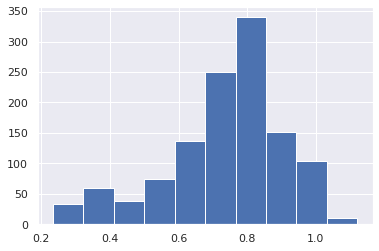

In [ ]:
_ = plt.hist(train.actual_productivity, 10)

In [ ]:
train.groupby('department').sum()[target]

department
finishing    380.99299
sweing       498.91090
Name: actual_productivity, dtype: float64

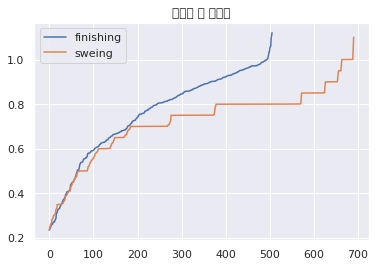

In [ ]:
_ = train[train.department=='finishing'][target].sort_values().reset_index(drop = True).plot()
_ = train[train.department=='sweing'][target].sort_values().reset_index(drop = True).plot()

_ = plt.title('부서별 실 생산성')
_ = plt.legend(['finishing', 'sweing'])

In [ ]:
def vibox(var): # 양적변수
    _ = plt.figure(figsize = (5, 8))
    _ = plt.violinplot(var, data = train)
    _ = plt.boxplot(var, data = train)
    _ = plt.title(f'{var} 이상치 및 분포')

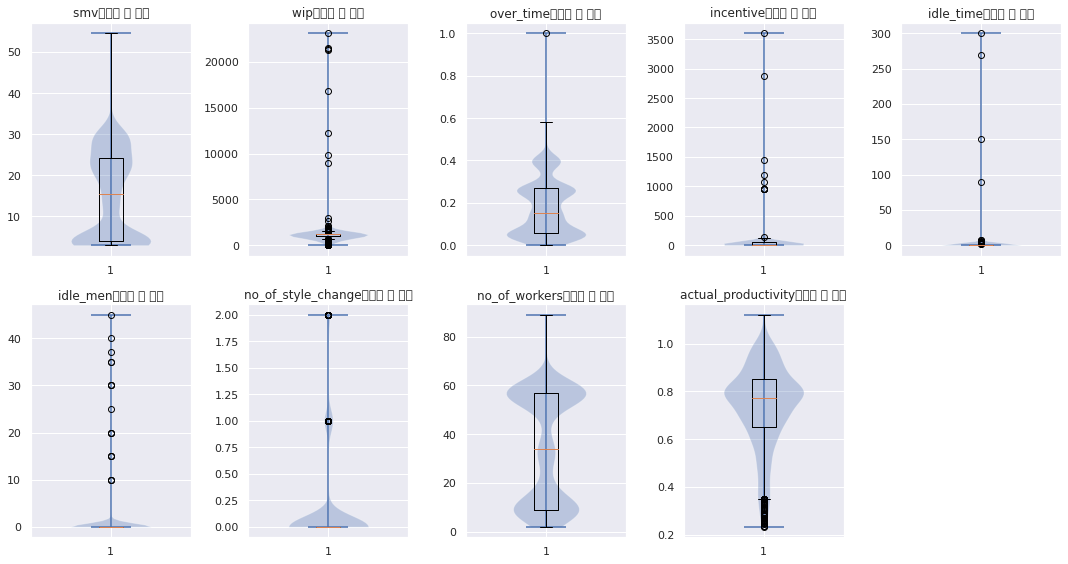

In [ ]:
## for loop 밖에서 그림판 먼저 만들어주기
fig = plt.figure(figsize = (15, 8))
rows = 2
cols = 5
for enu,i in enumerate(train.columns[5:]):
    ax = fig.add_subplot(rows, cols, enu+1)
    # vibox(i)
    _ = ax.violinplot(i, data = train)
    _ = ax.boxplot(i, data = train)
    _ = ax.set_title(i + '이상치 및 분포')
plt.tight_layout()

## Data Preprocessing

In [ ]:
# NaN to mean
train_wip_mean = np.mean(train_x["wip"])
train_x = train_x.replace({'wip': np.nan}, train_wip_mean)
test_X = test.replace({'wip': np.nan}, train_wip_mean) # Test 'wip' 데이터의 평균으로 대체 시 Data Leakage이므로, Train 'wip' 데이터의 평균으로 결측치 대체합니다.

In [ ]:
# Data Engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm, skew

In [ ]:
# qualitative to quantitative
from sklearn.preprocessing import LabelEncoder

qual_col = ['quarter','department','day']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    # Label Encoder가 Test 데이터로부터 Fitting되는 것은 Data Leakage이므로, Test 데이터에는 Train 데이터로 Fitting된 Label Encoder로부터 transform만 수행되어야 합니다.
    test[i] = le.transform(test[i]) 
print('Done.')

Done.


### 로그 변환

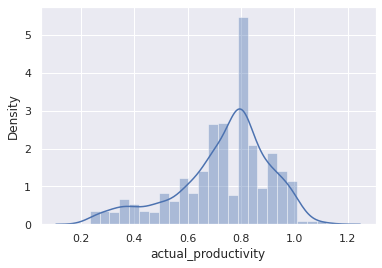

In [ ]:
# actual_productivity 의 분포 파악
sns.distplot(train['actual_productivity'])

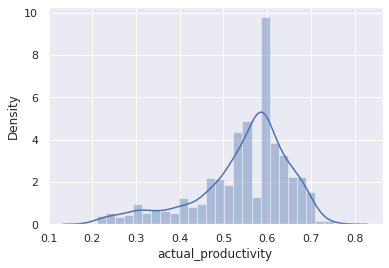

In [ ]:
# 로그변환 후
sns.distplot(np.log1p(train['actual_productivity']))

In [ ]:
train['actual_productivity'] = np.log1p(train['actual_productivity'])

display(train.head())

,ID,quarter,department,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,TRAIN_0000,Quarter1,sweing,Thursday,0.80,26.16,1108,0.27315,98,0,0,0,59,0.663064
1,TRAIN_0001,Quarter1,finishing,Thursday,0.75,3.94,1190,0.03704,0,0,0,0,8,0.634723
2,TRAIN_0002,Quarter1,sweing,Thursday,0.80,11.41,968,0.14120,50,0,0,0,30,0.588103
3,TRAIN_0003,Quarter1,sweing,Thursday,0.80,11.41,968,0.14120,50,0,0,0,30,0.588103
4,TRAIN_0004,Quarter1,sweing,Thursday,0.80,25.90,1170,0.07407,50,0,0,0,56,0.587998


In [ ]:
numeric_feats = train_x.dtypes[train_x.dtypes != "object"].index
skewed_feats = train_x[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
idle_time,20.523423
incentive,15.770951
wip,12.794304
idle_men,9.842725
no_of_style_change,2.938817
over_time,0.672453
smv,0.405428
quarter,0.385998
day,-0.029600
no_of_workers,-0.110826


In [ ]:
# 이 중에서 원래 범주형 변수였으며 수치 간 범위가 적은 피처를 제외하고 확인 및 log화 진행
skewness = skewness[abs(skewness)['Skew'] > 0.75]
skewness

,Skew
idle_time,20.523423
incentive,15.770951
wip,12.794304
idle_men,9.842725
no_of_style_change,2.938817
targeted_productivity,-2.141462


In [ ]:
skewness_features = ['idle_time', 'incentive', 'wip', 'idle_men', 'no_of_style_change', 'targeted_productivity']
skewness_features

['idle_time',
 'incentive',
 'wip',
 'idle_men',
 'no_of_style_change',
 'targeted_productivity']

In [ ]:
train_x[skewness_features] = np.log1p(train_x[skewness_features])
test[skewness_features] = np.log1p(test[skewness_features])

In [ ]:
# 피처변환 - 스케일링
# scaling된 데이터는 scaled를 붙임
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_x)
test_scaled = scaler.transform(test)
print(train_scaled.shape, test_scaled.shape)

(1197, 12) (818, 12)


In [ ]:
# 최종 피처 선택
# selection의 약자로 sel를 사용
# 원래 이 부분에서 항상 percentile를 통한 피처설렉션 과정을 거치기에 약자인 'sel'를 이용하였는데, 피처가 적어 그대로 진행
train_sel = train_scaled
test_sel = test_scaled
print(train_sel.shape, test_sel.shape)

(1197, 12) (818, 12)


## Modeling

In [ ]:
X = train_x.copy()
y = np.log1p(train_y)
X_test0 = test.copy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_valid.shape

((957, 12), (240, 12))

In [ ]:
from sklearn.metrics import make_scorer

def NMAE(true, pred):
    mae = np.mean(np.abs(true - pred))
    score = mae / np.mean(np.abs(true))
    return score

nmae_score = make_scorer(NMAE, greater_is_better=False)

In [ ]:
!pip install catboost
!pip install ngboost

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor, Pool
from ngboost import NGBRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [ ]:
etr=ExtraTreesRegressor(n_estimators=200)
lr=LinearRegression()
rg=Ridge()
rf=RandomForestRegressor(random_state = 42, criterion = 'mae')
gbr=GradientBoostingRegressor(random_state = 42, max_depth = 4, learning_rate=0.09, loss='huber', n_estimators=130)
xgb=XGBRegressor(random_state = 42, learning_rate=0.05, n_estimators=200)
lgb=LGBMRegressor(random_state = 42, learning_rate=0.05, n_estimators=200)
ada=AdaBoostRegressor(random_state = 42, learning_rate=0.03, n_estimators=100)
hgb=HistGradientBoostingRegressor(random_state=42, scoring=nmae_score, learning_rate=0.09)
ngb=NGBRegressor(random_state = 42, n_estimators = 500, verbose = 0, learning_rate = 0.03)
cat_reg=CatBoostRegressor(depth = 4, random_state = 42, loss_function = 'MAE', n_estimators = 3000, learning_rate = 0.03, verbose = 0)

In [ ]:
etr.fit(X_train,y_train)
lr.fit(X_train,y_train)
rg.fit(X_train,y_train)
rf.fit(X_train,y_train)
gbr.fit(X_train,y_train)
xgb.fit(X_train,y_train)
lgb.fit(X_train,y_train)
ada.fit(X_train,y_train)
hgb.fit(X_train,y_train)
ngb.fit(X_train,y_train)
cat_reg.fit(X_train,y_train)

[14:06:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_etr=etr.predict(X_valid)
y_lr=lr.predict(X_valid)
y_rg=rg.predict(X_valid)
y_rf=rf.predict(X_valid)
y_gbr=gbr.predict(X_valid)
y_xgb=xgb.predict(X_valid)
y_lgb=lgb.predict(X_valid)
y_ada=ada.predict(X_valid)
y_hgb=hgb.predict(X_valid)
y_ngb=ngb.predict(X_valid)
y_cat=cat_reg.predict(X_valid)

In [ ]:
score_etr=NMAE(y_valid, y_etr)
score_lr=NMAE(y_valid, y_lr)
score_rg=NMAE(y_valid, y_rg)
score_rf=NMAE(y_valid, y_rf)
score_gbr=NMAE(y_valid, y_gbr)
score_xgb=NMAE(y_valid, y_xgb)
score_lgb=NMAE(y_valid, y_lgb)
score_ada=NMAE(y_valid, y_ada)
score_hgb=NMAE(y_valid, y_hgb)
score_ngb=NMAE(y_valid, y_ngb)
score_cat=NMAE(y_valid, y_cat)

In [ ]:
print(score_etr)
print(score_lr)
print(score_rg)
print(score_rf)
print(score_gbr)
print(score_xgb)
print(score_lgb)
print(score_ada)
print(score_hgb)
print(score_ngb)
print(score_cat)

0.07866563519645892
0.09628124993609183
0.09885104764296512
0.07891420186982555
0.07054117959449903
0.07545822065512765
0.0817625489585103
0.09125368901131252
0.0813302897108832
0.07415309817394333
0.06831969913654026


`좋은 결과를 보이고 있는 모델들만 선정해줍니다. => ETR + RF + GBR + XGB + LGB + HGB + NGB + CAT`

### KFold

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, random_state = 42, shuffle = True)

In [ ]:
X = train_x.copy()
y = np.log1p(train_y)
X_test = test.copy()
target = X_test

In [ ]:
# ExtraTreesRegression
etr_pred = np.zeros(target.shape[0])
etr_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    etr = ExtraTreesRegressor(n_estimators=200)
    etr.fit(tr_x, tr_y)
    
    val_pred = np.expm1(etr.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    etr_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}')
    
    target_data = Pool(data = target, label = None)
    fold_pred = etr.predict(target) / 10
    etr_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(etr_val)}')

1 FOLD NMAE = 0.06826208108928102
2 FOLD NMAE = 0.07494057100714331
3 FOLD NMAE = 0.10058837880126154
4 FOLD NMAE = 0.0818034161125297
5 FOLD NMAE = 0.07696228949375038
6 FOLD NMAE = 0.08720047713687624
7 FOLD NMAE = 0.10823490044156402
8 FOLD NMAE = 0.07425942285693315
9 FOLD NMAE = 0.08536259988831188
10 FOLD NMAE = 0.09290347993102281
10FOLD Mean of NMAE = 0.0850517616758674


In [ ]:
# RandomForestRegressor
rf_pred = np.zeros(target.shape[0])
rf_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    rf = RandomForestRegressor(random_state = 42, criterion = 'mae')
    rf.fit(tr_x, tr_y)
    
    val_pred = np.expm1(rf.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    rf_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}')
    
    fold_pred = rf.predict(target) / 10
    rf_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(rf_val)}')

1 FOLD NMAE = 0.06831074876117758
2 FOLD NMAE = 0.08059384230922809
3 FOLD NMAE = 0.10613085991458993
4 FOLD NMAE = 0.07499388461483687
5 FOLD NMAE = 0.07529506543043493
6 FOLD NMAE = 0.09534155151012663
7 FOLD NMAE = 0.10498396949141468
8 FOLD NMAE = 0.08207570113998333
9 FOLD NMAE = 0.08719463914990877
10 FOLD NMAE = 0.08736164273043462
10FOLD Mean of NMAE = 0.08622819050521355


In [ ]:
# GradientBoostingRegressor
gbr_pred = np.zeros(target.shape[0])
gbr_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    gbr = GradientBoostingRegressor(random_state = 42, max_depth = 4, learning_rate=0.09, loss='huber', n_estimators=130)
    gbr.fit(tr_x, tr_y)
    
    val_pred = np.expm1(gbr.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    gbr_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}')
    
    fold_pred = gbr.predict(target) / 10
    gbr_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(gbr_val)}')

1 FOLD NMAE = 0.06529631783212067
2 FOLD NMAE = 0.09397257911281993
3 FOLD NMAE = 0.10202667775263127
4 FOLD NMAE = 0.07756934089124773
5 FOLD NMAE = 0.07265185485516226
6 FOLD NMAE = 0.08258520322844086
7 FOLD NMAE = 0.10289438429026558
8 FOLD NMAE = 0.07884480371453775
9 FOLD NMAE = 0.07637248830752219
10 FOLD NMAE = 0.08332494479919537
10FOLD Mean of NMAE = 0.08355385947839436


In [ ]:
# xgbr
xgb_pred = np.zeros(target.shape[0])
xgb_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    xgb = XGBRegressor(random_state = 42, learning_rate=0.05, n_estimators=200)
    xgb.fit(tr_x, tr_y)
    
    val_pred = np.expm1(xgb.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    xgb_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}')
    
    fold_pred = xgb.predict(target) / 10
    xgb_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(xgb_val)}')

[14:07:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 FOLD NMAE = 0.07186768514719463
[14:07:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2 FOLD NMAE = 0.09579800002765715
[14:07:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3 FOLD NMAE = 0.1108497261895095
[14:07:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
4 FOLD NMAE = 0.07933394212885465
[14:07:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5 FOLD NMAE = 0.0802563505933003
[14:07:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
6 FOLD NMAE = 0.0929858027128361
[14:07:30] WARNING: /workspace/src/ob

In [ ]:
# lgbr
lgb_pred = np.zeros(target.shape[0])
lgb_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    lgb = LGBMRegressor(random_state = 42, learning_rate=0.05, n_estimators=200)
    lgb.fit(tr_x, tr_y)
    
    val_pred = np.expm1(lgb.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    lgb_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}')
    
    fold_pred = lgb.predict(target) / 10
    lgb_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(lgb_val)}')

1 FOLD NMAE = 0.08135974745788849
2 FOLD NMAE = 0.09530452934956568
3 FOLD NMAE = 0.110063422693218
4 FOLD NMAE = 0.08689140545324389
5 FOLD NMAE = 0.08124893343357897
6 FOLD NMAE = 0.0937845279810962
7 FOLD NMAE = 0.10727125393461602
8 FOLD NMAE = 0.08974568684583788
9 FOLD NMAE = 0.08814118565662374
10 FOLD NMAE = 0.08972579429581733
10FOLD Mean of NMAE = 0.09235364871014862


In [ ]:
# HGBRegressor
hgbr_pred = np.zeros(target.shape[0])
hgbr_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    hgbr = HistGradientBoostingRegressor(random_state=42, scoring=nmae_score, learning_rate=0.09)
    hgbr.fit(tr_x, tr_y)
    
    val_pred = np.expm1(hgbr.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    hgbr_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}')
    
    fold_pred = hgbr.predict(target) / 10
    hgbr_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(hgbr_val)}')

1 FOLD NMAE = 0.08145900160316864
2 FOLD NMAE = 0.09172045131030787
3 FOLD NMAE = 0.11096070013234259
4 FOLD NMAE = 0.08473174696796712
5 FOLD NMAE = 0.0793613710229947
6 FOLD NMAE = 0.09389893794966692
7 FOLD NMAE = 0.10582649516176315
8 FOLD NMAE = 0.0888945780930183
9 FOLD NMAE = 0.08874410325347025
10 FOLD NMAE = 0.09186433571859831
10FOLD Mean of NMAE = 0.09174617212132978


In [ ]:
# NGBRegressor
ngb_pred = np.zeros(target.shape[0])
ngb_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    ngb = NGBRegressor(random_state = 42, n_estimators = 500, verbose = 0, learning_rate = 0.03)
    ngb.fit(tr_x, tr_y, val_x, val_y, early_stopping_rounds = 300)
    
    val_pred = np.expm1(ngb.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    ngb_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}')
    
    target_data = Pool(data = target, label = None)
    fold_pred = ngb.predict(target) / 10
    ngb_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(ngb_val)}')

1 FOLD NMAE = 0.07178842038102698
2 FOLD NMAE = 0.09524815331315886
3 FOLD NMAE = 0.1097951288241936
4 FOLD NMAE = 0.07942602389684174
5 FOLD NMAE = 0.08098582600283528
6 FOLD NMAE = 0.09289199861225515
7 FOLD NMAE = 0.11028345796172924
8 FOLD NMAE = 0.08009110764750017
9 FOLD NMAE = 0.08483129799104287
10 FOLD NMAE = 0.08970746348447384
10FOLD Mean of NMAE = 0.08950488781150578


In [ ]:
# cat
cat_pred = np.zeros(target.shape[0])
cat_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    tr_data = Pool(data = tr_x, label = tr_y)
    val_data = Pool(data = val_x, label = val_y)
    
    cat = CatBoostRegressor(depth = 4, random_state = 42, loss_function = 'MAE', n_estimators = 3000, learning_rate = 0.03, verbose = 0)
    cat.fit(tr_data, eval_set = val_data, early_stopping_rounds = 750, verbose = 1000)
    
    val_pred = np.expm1(cat.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    cat_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}')
    
    target_data = Pool(data = target, label = None)
    fold_pred = cat.predict(target) / 10
    cat_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(cat_val)}')

0:	learn: 0.0517657	test: 0.1245977	best: 0.1245977 (0)	total: 696us	remaining: 2.09s
1000:	learn: 0.0243648	test: 0.1220530	best: 0.1201752 (295)	total: 497ms	remaining: 992ms
Stopped by overfitting detector  (750 iterations wait)

bestTest = 0.1201752365
bestIteration = 295

Shrink model to first 296 iterations.
1 FOLD NMAE = 0.06299483416492738
0:	learn: 0.0508419	test: 0.1234689	best: 0.1234689 (0)	total: 512us	remaining: 1.53s
Stopped by overfitting detector  (750 iterations wait)

bestTest = 0.1234688761
bestIteration = 0

Shrink model to first 1 iterations.
2 FOLD NMAE = 0.14168159063266034
0:	learn: 0.0504318	test: 0.1299696	best: 0.1299696 (0)	total: 552us	remaining: 1.66s
Stopped by overfitting detector  (750 iterations wait)

bestTest = 0.1262961432
bestIteration = 228

Shrink model to first 229 iterations.
3 FOLD NMAE = 0.10720141845273883
0:	learn: 0.0513457	test: 0.1306619	best: 0.1306619 (0)	total: 509us	remaining: 1.53s
Stopped by overfitting detector  (750 iterations w

In [ ]:
# 검증 성능 확인하기
val_list = [etr_val, rf_val, gbr_val, xgb_val, lgb_val, hgbr_val, ngb_val, cat_val]
for val in val_list :
  print("{:.8f}".format(np.mean(val))) 

0.08505176
0.08622819
0.08355386
0.08958724
0.09235365
0.09174617
0.08950489
0.09212901


`kfold 전보다 성능이 훨씬 떨어짐`

In [ ]:
# # kfold 전 모델링
pred_etr = etr.predict(X_test0)
pred_rf = rf.predict(X_test0)
pred_gbr = gbr.predict(X_test0)
pred_xgb = xgb.predict(X_test0)
pred_lgb = lgb.predict(X_test0)
pred_hgb = hgb.predict(X_test0)
pred_ngb = ngb.predict(X_test0)
pred_cat = cat_reg.predict(X_test0)

In [ ]:
submit = pd.read_csv('sample_submission.csv')
# lgb, hgb를 제외한 나머지만 사용
submit['actual_productivity'] = (pred_etr + pred_rf + pred_gbr + pred_xgb + pred_ngb + pred_cat) / 6
submit

,ID,actual_productivity
0,TEST_0000,0.314522
1,TEST_0001,0.308818
2,TEST_0002,0.288389
3,TEST_0003,0.313121
4,TEST_0004,0.381916
...,...,...
813,TEST_0813,0.352022
814,TEST_0814,0.360864
815,TEST_0815,0.352369
816,TEST_0816,0.284440


In [ ]:
submit.to_csv('submit_13.csv', index=False)